# Munduku Deo

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Emotion Speech Recognition"
!cd "/content/drive/My Drive/Emotion Speech Recognition"
!ls

Dataset		  demo_audio5.wav     Predictions.csv
dataset_attr.csv  demo_audio.wav      speech-emotion-recognition.ipynb
demo_audio2.wav   features_dataframe  Trained_Models
demo_audio3.wav   model.json	      utils
demo_audio4.wav   Others
drive  sample_data


#  Installation of Dependencies



Essential requirement of of our project :
1. **Python 3.7**
2. **Librosa**
3. **PyTorch**
4. **Keras**
5. **GPU**

We have Already installed this frameworks and packages.

In [ ]:
# Provides a way of using operating system dependent functionality.
import os

# LibROSA provides the audio analysis
import librosa
# Need to implictly import from librosa
import librosa.display

# Import the audio playback widget
import IPython.display as ipd
from IPython.display import Image

# Enable plot in the notebook
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt

# These are generally useful to have around
import numpy as np
import pandas as pd


# To build Neural Network and Create desired Model
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D #, AveragePooling1D
from keras.layers import Flatten, Dropout, Activation # Input,
from keras.layers import Dense #, Embedding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

Populating the interactive namespace from numpy and matplotlib


# 3. Data Preparation


### Plotting the audio file's waveform and its spectrogram

In [ ]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Emotion Speech Recognition/Dataset/anger/anger016.wav')
# To play audio this in the jupyter notebook
ipd.Audio('/content/drive/My Drive/Emotion Speech Recognition/Dataset/anger/anger016.wav')

In [ ]:
len(data)

87553

In [ ]:
sampling_rate

22050

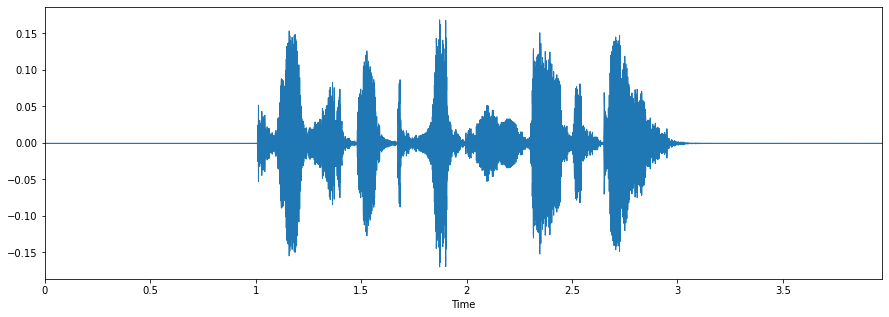

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

### Setup the Basic Paramter

In [ ]:
dataset_path = os.path.abspath('./Dataset')
destination_path = os.path.abspath('./')
# To shuffle the dataset instances/records
randomize = True
# for spliting dataset into training and testing dataset
split = 0.8
# Number of sample per second e.g. 16KHz
sampling_rate = 20000
emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]

!ls


drive  sample_data


### Converting Dataset in CSV format

it will cause easy operation on Dataset.

In [ ]:
# loading dataframes using dataset module
!cd "/content/drive/My Drive/Emotion Speech Recognition/utils"
import dataset
# To know more about "create_and_load_meta_csv_df" function and it's working, go to "./utils/dataset.py" script.
df, train_df, test_df = dataset.create_and_load_meta_csv_df(dataset_path, destination_path, randomize, split)

ModuleNotFoundError: ignored

In [ ]:
print('Dataset samples  : ', len(df),"\nTraining Samples : ", len(train_df),"\ntesting Samples  : ", len(test_df))

Dataset samples  :  2556 
Training Samples :  2044 
testing Samples  :  512


# 4. Data Visualization

Let's understand what is our dataset.

In [ ]:
df.head()

,path,label
0,/content/drive/My Drive/Emotion Speech Recogni...,0
1,/content/drive/My Drive/Emotion Speech Recogni...,1
2,/content/drive/My Drive/Emotion Speech Recogni...,6
3,/content/drive/My Drive/Emotion Speech Recogni...,2
4,/content/drive/My Drive/Emotion Speech Recogni...,0


In [ ]:
print("Actual Audio : ", df['path'][0])
print("Labels       : ", df['label'][0])


Actual Audio :  /content/drive/My Drive/Emotion Speech Recognition/Dataset/anger/anger111.wav
Labels       :  0



### Labels Assigned for emotions :
- 0 : anger
- 1 : disgust
- 2 : fear
- 3 : happy
- 4 : neutral
- 5 : sad
- 6 : surprise


In [ ]:
unique_labels = train_df.label.unique()
unique_labels.sort()
print("unique labels in Emtion dataset : ")
print(*unique_labels, sep=', ')
unique_labels_counts = train_df.label.value_counts(sort=False)
print("\n\nCount of unique labels in Emtion dataset : ")
print(*unique_labels_counts,sep=', ')

unique labels in Emtion dataset : 
0, 1, 2, 3, 4, 5, 6


Count of unique labels in Emtion dataset : 
355, 193, 355, 338, 255, 339, 209


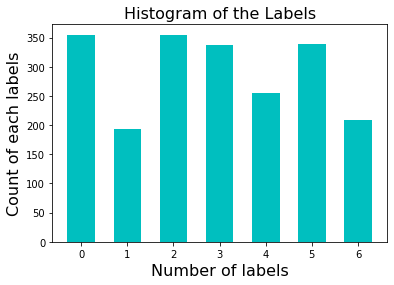

In [ ]:
# Histogram of the classes
plt.bar(unique_labels, unique_labels_counts,align = 'center', width=0.6, color = 'c')
plt.xlabel('Number of labels', fontsize=16)
plt.xticks(unique_labels)
plt.ylabel('Count of each labels', fontsize=16)
plt.title('Histogram of the Labels', fontsize=16)
plt.show()

# 5. Data Pre-Processing

### Getting the features of audio files using librosa

Calculating MFCC, Pitch, magnitude, Chroma features.

In [ ]:
Image('./images/feature_plots.png')

In [ ]:
from utils.feature_extraction import get_features_dataframe
from utils.feature_extraction import get_audio_features

To know more about "get_features_dataframe" and "get_audio_features" functions and their working, go to "./utils/feature_extraction.py" script.

In [ ]:

# trainfeatures, trainlabel = get_features_dataframe(train_df, sampling_rate)
# testfeatures, testlabel = get_features_dataframe(test_df, sampling_rate)

# I have ran above 2 lines and get the featured dataframe.
# and store it into pickle file to use it for later purpose.
# it take too much time to generate features(around 30-40 minutes).

trainfeatures = pd.read_pickle('./features_dataframe/trainfeatures')
trainlabel = pd.read_pickle('./features_dataframe/trainlabel')
testfeatures = pd.read_pickle('./features_dataframe/testfeatures')
testlabel = pd.read_pickle('./features_dataframe/testlabel')

In [ ]:
trainfeatures.shape

(2044, 65)

In [ ]:
trainfeatures = trainfeatures.fillna(0)
testfeatures = testfeatures.fillna(0)

In [ ]:
# By using .ravel() : Converting 2D to 1D e.g. (512,1) -> (512,). To prevent DataConversionWarning

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel).ravel()
X_test = np.array(testfeatures)
y_test = np.array(testlabel).ravel()


In [ ]:
y_train[:5]

array([3, 2, 2, 0, 3])

In [ ]:
# One-Hot Encoding
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

### Changing dimension for CNN model

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape

(2044, 65, 1)

# 6. Model Creation

In [ ]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 65, 256)           1536      
_________________________________________________________________
activation_1 (Activation)    (None, 65, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 65, 128)           163968    
_________________________________________________________________
activation_2 (Activation)    (None, 65, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 65, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 128)           

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

# 7. Training and Evaluation

### Removed the whole training part for avoiding unnecessary long epochs list

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=370, validation_data=(x_testcnn, y_test))

Train on 2044 samples, validate on 512 samples
Epoch 1/370
2044/2044 [==============================] - 6s 3ms/step - loss: 1.9907 - accuracy: 0.1908 - val_loss: 1.8025 - val_accuracy: 0.2539
Epoch 2/370
2044/2044 [==============================] - 5s 3ms/step - loss: 1.8333 - accuracy: 0.2485 - val_loss: 1.7410 - val_accuracy: 0.2715
Epoch 3/370
2044/2044 [==============================] - 5s 3ms/step - loss: 1.7626 - accuracy: 0.2794 - val_loss: 1.6901 - val_accuracy: 0.3008
Epoch 4/370
2044/2044 [==============================] - 5s 3ms/step - loss: 1.7089 - accuracy: 0.3151 - val_loss: 1.6708 - val_accuracy: 0.3535
Epoch 5/370
2044/2044 [==============================] - 5s 3ms/step - loss: 1.6715 - accuracy: 0.3390 - val_loss: 1.6649 - val_accuracy: 0.3340
Epoch 6/370
2044/2044 [==============================] - 5s 3ms/step - loss: 1.6512 - accuracy: 0.3508 - val_loss: 1.6174 - val_accuracy: 0.3574
Epoch 7/370
2044/2044 [==============================] - 5s 3ms/step - loss: 1.6250

### Loss Vs Iterations

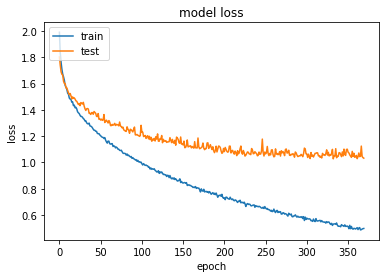

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Saving the model

In [ ]:
model_name = 'omar.h5'
save_dir = os.path.join(os.getcwd(), 'Trained_Models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Emotion Speech Recognition/Trained_Models/omar.h5 


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### Loading the model

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./Trained_Models/omar.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 60.94%


# 8. Test Set Prediction

### Predicting emotions on the test data

In [ ]:
preds = loaded_model.predict(x_testcnn,
                         batch_size=32,
                         verbose=1)

512/512 [==============================] - 0s 508us/step


In [ ]:
preds

array([[1.65149197e-01, 8.93974677e-03, 6.66954696e-01, ...,
        9.79160145e-03, 4.15485166e-03, 1.20396875e-01],
       [9.15554821e-01, 5.14653453e-04, 4.48039956e-02, ...,
        4.51715005e-06, 1.08550407e-03, 2.44702352e-03],
       [7.05087557e-03, 8.35201204e-01, 3.47535987e-03, ...,
        1.25901535e-01, 1.37936668e-02, 1.25329886e-02],
       ...,
       [1.31604751e-03, 5.85603535e-01, 3.60530585e-01, ...,
        2.61806753e-02, 8.10955372e-03, 4.76477947e-03],
       [2.73483954e-02, 1.92590378e-04, 4.91533786e-01, ...,
        5.17192075e-06, 3.92119661e-02, 3.83311010e-04],
       [2.72935461e-02, 7.73254111e-02, 1.91081628e-01, ...,
        2.85340450e-03, 6.65894896e-03, 6.35433197e-01]], dtype=float32)

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([2, 0, 1, 3, 3, 0, 3, 5, 3, 5, 2, 2, 0, 4, 4, 3, 0, 5, 4, 5, 2, 6,
       3, 4, 0, 3, 0, 2, 2, 3, 3, 4, 5, 3, 1, 3, 2, 3, 2, 3, 5, 6, 4, 0,
       5, 1, 1, 5, 1, 5, 1, 3, 2, 2, 4, 5, 2, 2, 5, 4, 4, 0, 5, 0, 0, 3,
       5, 0, 0, 0, 3, 2, 6, 2, 4, 5, 5, 6, 0, 1, 5, 0, 0, 2, 0, 3, 6, 0,
       2, 2, 3, 0, 4, 2, 2, 6, 6, 4, 4, 2, 2, 5, 5, 4, 3, 5, 5, 3, 6, 3,
       2, 3, 0, 3, 4, 5, 2, 5, 2, 0, 5, 3, 6, 3, 0, 5, 6, 2, 5, 6, 5, 0,
       1, 3, 4, 0, 3, 0, 0, 4, 0, 0, 1, 2, 0, 0, 1, 3, 4, 2, 5, 0, 4, 0,
       5, 5, 1, 2, 2, 5, 0, 5, 5, 5, 0, 0, 4, 4, 3, 6, 6, 5, 6, 3, 6, 1,
       6, 0, 5, 5, 6, 0, 4, 6, 0, 2, 2, 2, 1, 0, 3, 0, 4, 0, 4, 1, 0, 6,
       2, 0, 0, 2, 5, 4, 6, 3, 4, 6, 0, 4, 3, 3, 2, 2, 1, 4, 4, 6, 5, 4,
       5, 4, 0, 3, 4, 4, 1, 5, 3, 0, 5, 4, 4, 4, 0, 2, 4, 5, 1, 6, 6, 5,
       5, 2, 5, 5, 5, 2, 1, 0, 1, 4, 2, 5, 2, 1, 1, 1, 3, 4, 3, 3, 4, 4,
       2, 6, 5, 6, 2, 2, 5, 4, 2, 1, 4, 3, 2, 3, 0, 0, 2, 0, 5, 0, 3, 5,
       3, 4, 5, 6, 5, 3, 3, 6, 5, 0, 5, 5, 5, 0, 5,

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,2
1,0
2,1
3,3
4,3
5,0
6,3
7,5
8,3
9,5


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,2
1,0
2,1
3,2
4,3
5,6
6,6
7,5
8,3
9,5


In [ ]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [ ]:
finaldf[130:140]

,actualvalues,predictedvalues
130,1,5
131,5,0
132,1,1
133,3,3
134,4,4
135,0,0
136,3,3
137,0,0
138,1,0
139,6,4


In [ ]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
0,81
1,60
2,83
3,85
4,53
5,97
6,53


In [ ]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
0,91
1,36
2,87
3,84
4,60
5,102
6,52


In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

# 9. Live Demonstration

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [ ]:
demo_audio_path = './Dataset/sad/sad001.wav'
ipd.Audio('./Dataset/sad/sad001.wav')

In [ ]:
demo_mfcc, demo_pitch, demo_mag, demo_chrom = get_audio_features(demo_audio_path,sampling_rate)

mfcc = pd.Series(demo_mfcc)
pit = pd.Series(demo_pitch)
mag = pd.Series(demo_mag)
C = pd.Series(demo_chrom)
demo_audio_features = pd.concat([mfcc,pit,mag,C],ignore_index=True)

In [ ]:
demo_audio_features= np.expand_dims(demo_audio_features, axis=0)
demo_audio_features= np.expand_dims(demo_audio_features, axis=2)

In [ ]:
demo_audio_features.shape

(1, 65, 1)

In [ ]:
livepreds = loaded_model.predict(demo_audio_features,
                         batch_size=32,
                         verbose=1)

1/1 [==============================] - 0s 8ms/step


In [ ]:
livepreds

array([[7.9253950e-05, 2.8045883e-03, 7.8116149e-01, 4.2922363e-02,
        5.2737262e-02, 9.1776915e-02, 2.8518019e-02]], dtype=float32)

In [ ]:
# emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
index = livepreds.argmax(axis=1).item()
index

2

In [ ]:
emotions[index]

'fear'